In [1]:
import refinitiv.data as rd
import pandas as pd
import matplotlib.pyplot as plt
import ccxt

In [2]:
exchange = ccxt.kraken()

In [3]:
# Initialize the exchange
exchange = ccxt.binanceus()

# Define symbols
symbols = {
    'Solana': 'SOL/USD',
    # 'Orca': 'ORCA/USD',
    # 'Raydium': 'RAY/USD'
}

# Define timeframe for fetching data
timeframe = '1d'  # Daily data

# Function to fetch and convert data into a DataFrame
def fetch_crypto_data(symbol_name):
    ohlcv_data = exchange.fetch_ohlcv(symbol_name, timeframe=timeframe, limit=10000000)
    df = pd.DataFrame(ohlcv_data, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
    return df

# Dictionary to hold DataFrames for each symbol
crypto_data_frames = {}

# Fetch and store data for each cryptocurrency
for name, symbol in symbols.items():
    crypto_data_frames[name] = fetch_crypto_data(symbol)

# Access the DataFrame for a specific cryptocurrency, e.g., Solana
solana_df = crypto_data_frames['Solana']
print("Solana Data:")
print(solana_df.head())  # Print first few rows

Solana Data:
   Timestamp    Open    High     Low   Close    Volume
0 2020-10-18  2.2074  2.2576  2.2026  2.2104   6010.20
1 2020-10-19  2.2144  2.2184  2.0505  2.0505  14348.62
2 2020-10-20  2.0561  2.1043  1.8554  1.8930  26152.62
3 2020-10-21  1.9106  2.0991  1.8683  1.8853  61574.72
4 2020-10-22  1.9128  2.0857  1.8677  1.9549  22998.12


In [4]:
# rd.open_session()

In [5]:
# FX & Money RIC
raydium_ric = 'RAYUSDT=BNNC'
orca_ric = 'ORCA=KRKN'
solana_ric = 'SOL=KRKN'

In [2]:
import yfinance as yf

In [4]:
bitcoin_ticker = 'BTC-USD'
bitcoin_data = yf.download(bitcoin_ticker, start='2021-01-01', end='2024-03-31')

solana_ticker = 'SOL-USD'
solana_data = yf.download(solana_ticker, start="2021-01-01", end="2024-03-31")

raydium_ticker = 'RAY-USD'
raydium_data = yf.download(raydium_ticker, start="2021-01-01", end="2024-03-31")

orca_ticker = 'ORCA-USD'
orca_data = yf.download(orca_ticker, start="2021-01-01", end="2024-03-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
# solana_price_df = rd.get_history(solana_ric, interval = '1D', count = 1112)
# raydium_price_df = rd.get_history(raydium_ric, interval = '1D', count = 1112)
# orca_price_df = rd.get_history(orca_ric, interval = '1D', count = 1112)

In [9]:
# solana_price_df.index = pd.to_datetime(solana_price_df.index, format = '%Y-%m-%d')
# sol_daily = solana_price_df['TRDPRC_1']

# raydium_price_df.index = pd.to_datetime(raydium_price_df.index, format = '%Y-%m-%d')
# ray_daily = raydium_price_df['TRDPRC_1']

# orca_price_df.index = pd.to_datetime(orca_price_df.index, format = '%Y-%m-%d')
# orca_daily = orca_price_df['TRDPRC_1']

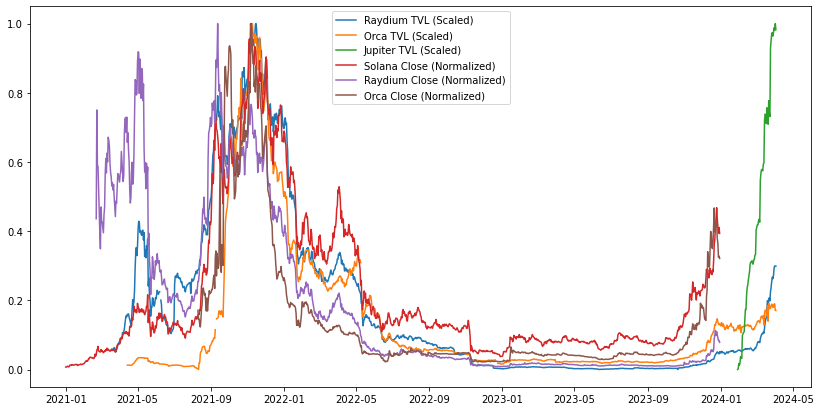

In [27]:
# Load TVL Data for Top Solana DEX
solana_dex = pd.read_csv('chain-dataset-Solana.csv')

orca_tvl = solana_dex[solana_dex['Protocol'] == 'Orca'].drop(columns = ['Protocol']).T
orca_tvl.index = pd.to_datetime(orca_tvl.index, format='%d/%m/%Y')
orca_tvl.rename(columns={5:'Total Value Locked'}, inplace = True)

raydium_tvl = solana_dex[solana_dex['Protocol'] == 'Raydium'].drop(columns = ['Protocol']).T
raydium_tvl.index = pd.to_datetime(raydium_tvl.index, format='%d/%m/%Y')
raydium_tvl.rename(columns={1:'Total Value Locked'}, inplace = True)

jup_tvl = solana_dex[solana_dex['Protocol'] == 'Jupiter Perpetual Exchange'].drop(columns = ['Protocol']).T
jup_tvl.index = pd.to_datetime(jup_tvl.index, format='%d/%m/%Y')
jup_tvl.rename(columns={98:'Total Value Locked'}, inplace = True)

tvl_data = pd.DataFrame({
    'Raydium': raydium_tvl['Total Value Locked'],
    'Orca': orca_tvl['Total Value Locked'],
    'Jupiter': jup_tvl['Total Value Locked']
})

# Perform Min-Max scaling
scaled_tvl_data = (tvl_data - tvl_data.min()) / (tvl_data.max() - tvl_data.min())

# Now plot the scaled TVL data along with the cryptocurrency close prices
plt.figure(figsize=(14, 7))  # Adjust the figure size as necessary

# Plotting the scaled TVL data
plt.plot(scaled_tvl_data.index, scaled_tvl_data['Raydium'], label='Raydium TVL (Scaled)')
plt.plot(scaled_tvl_data.index, scaled_tvl_data['Orca'], label='Orca TVL (Scaled)')
plt.plot(scaled_tvl_data.index, scaled_tvl_data['Jupiter'], label='Jupiter TVL (Scaled)')

period = 20

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(df, column_name='Normalized Price'):
    df['Middle Band'] = df[column_name].rolling(window=period).mean()
    df['Standard Deviation'] = df[column_name].rolling(window=period).std()
    df['Upper Band'] = df['Middle Band'] + (df['Standard Deviation'] * 2)
    df['Lower Band'] = df['Middle Band'] - (df['Standard Deviation'] * 2)
    return df

# Normalize TVL data function
def normalize_data(df):
    return (df - df.min()) / (df.max() - df.min())

# Process and normalize TVL data for each DEX
orca_tvl_normalized = normalize_data(orca_tvl['Total Value Locked']).to_frame(name='Normalized Price')
raydium_tvl_normalized = normalize_data(raydium_tvl['Total Value Locked']).to_frame(name='Normalized Price')
jup_tvl_normalized = normalize_data(jup_tvl['Total Value Locked']).to_frame(name='Normalized Price')

# Calculate Bollinger Bands for each DEX
orca_with_bands = calculate_bollinger_bands(orca_tvl_normalized)
raydium_with_bands = calculate_bollinger_bands(raydium_tvl_normalized)
jup_with_bands = calculate_bollinger_bands(jup_tvl_normalized)

# Assuming solana_data and others are already aligned with the same date index
# Plotting the cryptocurrency closing prices directly
# Normalize these if they're not in the same scale as the scaled TVL data
plt.plot(solana_data['Close'] / solana_data['Close'].max(), label='Solana Close (Normalized)')
plt.plot(raydium_data['Close'] / raydium_data['Close'].max(), label='Raydium Close (Normalized)')
plt.plot(orca_data['Close'] / orca_data['Close'].max(), label='Orca Close (Normalized)')

plt.legend()
plt.show()

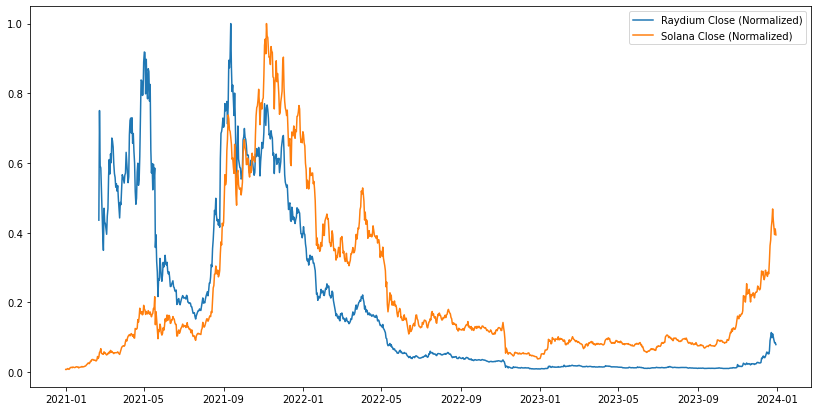

In [26]:
plt.figure(figsize=(14, 7))  # Adjust the figure size as necessary
plt.plot(raydium_data['Close'] / raydium_data['Close'].max(), label='Raydium Close (Normalized)')
plt.plot(solana_data['Close'] / solana_data['Close'].max(), label='Solana Close (Normalized)')
plt.legend()
plt.show()

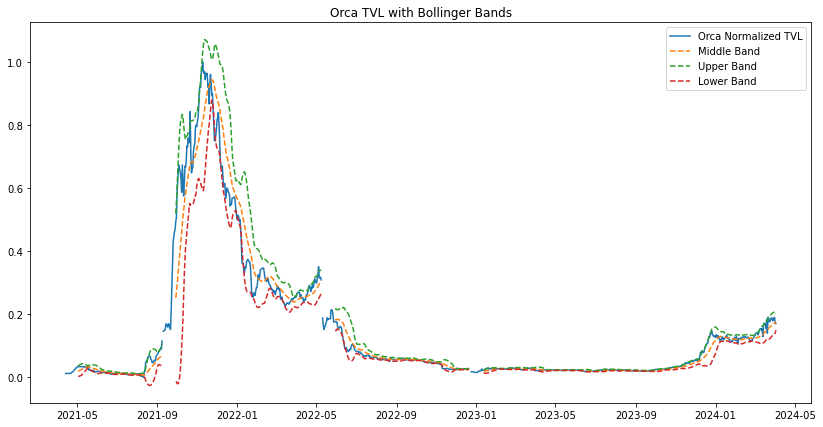

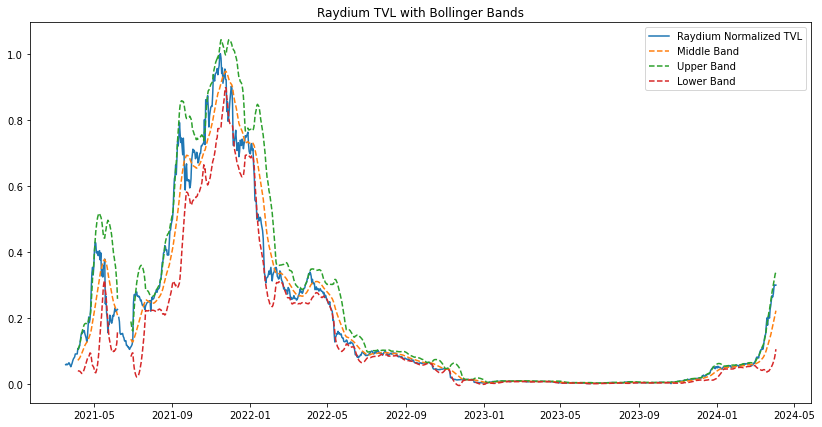

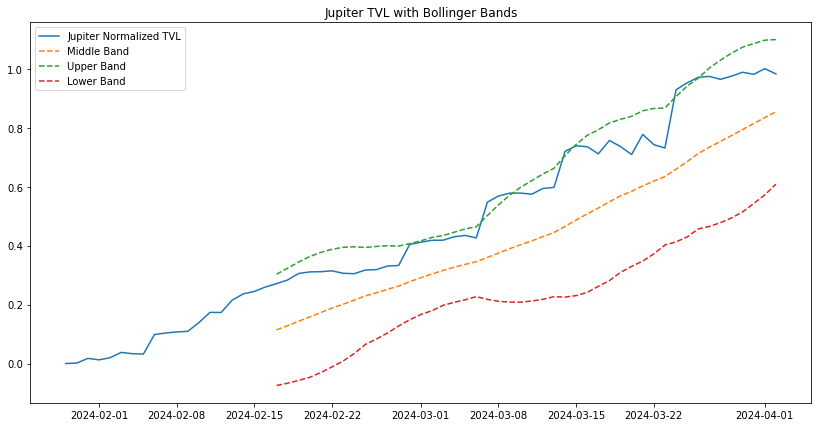

In [28]:
# Example plotting for one DEX, repeat as necessary for others
def plot_dex_with_bands(df, dex_name):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Normalized Price'], label=f'{dex_name} Normalized TVL')
    plt.plot(df.index, df['Middle Band'], label='Middle Band', linestyle='--')
    plt.plot(df.index, df['Upper Band'], label='Upper Band', linestyle='--')
    plt.plot(df.index, df['Lower Band'], label='Lower Band', linestyle='--')
    plt.legend()
    plt.title(f'{dex_name} TVL with Bollinger Bands')
    plt.show()

# Plot for each DEX
plot_dex_with_bands(orca_with_bands, 'Orca')
plot_dex_with_bands(raydium_with_bands, 'Raydium')
plot_dex_with_bands(jup_with_bands, 'Jupiter')

In [24]:
scaled_tvl_data['Orca'][20:50]

2021-04-07         NaN
2021-04-08         NaN
2021-04-09         NaN
2021-04-10         NaN
2021-04-11         NaN
2021-04-12         NaN
2021-04-13         NaN
2021-04-14    0.012351
2021-04-15    0.012550
2021-04-16    0.012790
2021-04-17    0.012510
2021-04-18    0.012327
2021-04-19    0.012329
2021-04-20    0.012156
2021-04-21    0.012780
2021-04-22    0.013013
2021-04-23    0.015379
2021-04-24    0.016916
2021-04-25    0.017626
2021-04-26    0.020406
2021-04-27    0.022783
2021-04-28    0.026019
2021-04-29    0.027417
2021-04-30    0.030966
2021-05-01    0.030995
2021-05-02    0.033613
2021-05-03    0.034356
2021-05-04    0.034056
2021-05-05    0.033832
2021-05-06    0.034291
Name: Orca, dtype: float64

In [14]:
solana_df['High']

0       2.2576
1       2.2184
2       2.1043
3       2.0991
4       2.0857
        ...   
995    19.7800
996    19.9700
997    20.0800
998    21.9900
999    24.1600
Name: High, Length: 1000, dtype: float64